In [1]:
traindata_rate=[0.7,0.8,0.9]

# Fitness Function

In [2]:
import numpy as np
import pandas as pd
from sklearn import cross_validation, ensemble, preprocessing, metrics
import pandas as pd
import numpy as np
from sklearn import preprocessing, linear_model
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression

def create_chromsom_value_X(filename):
    chromosom_value_X=[]
    ETF_train = pd.read_csv(filename)
    col_list=list(ETF_train.columns)

    for index in range(0,len(col_list)-1):
        chromosom_value_X.append([0,1])
    return chromosom_value_X

def create_chromsom_value_all(filename):
    chromosom_value=create_chromsom_value_X(filename)
    chromosom_value.append(traindata_rate)
    return chromosom_value

def create_x_tmp(ETF_train,col_list,chromosome):
    x_tmp=[]
    for index in range(0,len(col_list)-1):
        if chromosome[index] ==1:
            x_tmp.append(ETF_train[col_list[index]])
    return x_tmp


def Regressionn_model(filename,chromsome):
    # 載入資料
    ETF_train = pd.read_csv(filename)
    col_list=list(ETF_train.columns)

    traindata_rate=chromsome[len(col_list)-1]

    # 建立訓練與測試資料
    x_tmp=create_x_tmp(ETF_train,col_list,chromsome)
    ETF_X = pd.DataFrame(x_tmp).T
    ETF_Y = ETF_train["Y"]

    train_X=ETF_X[:round(len(ETF_train)*traindata_rate)]
    test_X=ETF_X[round(len(ETF_train)*traindata_rate):]
    train_Y=ETF_Y[:round(len(ETF_train)*traindata_rate)]
    test_Y=ETF_Y[round(len(ETF_train)*traindata_rate):]
    
    lm=LinearRegression()
    lm.fit(train_X,train_Y)
    #模型績效(MSE & R^2)
    mse=np.mean((lm.predict(test_X)-test_Y)**2)
    R_squared=lm.score(test_X,test_Y)
    adj_r_squared = R_squared - (1 - R_squared) * (test_X.shape[1] / (test_X.shape[0] - test_X.shape[1] - 1))-0.4
#     mse=np.mean((lm.predict(train_X)-train_Y)**2)
#     R_squared=lm.score(train_X,train_Y)
#     adj_r_squared = R_squared - (1 - R_squared) * (train_X.shape[1] / (train_X.shape[0] - train_X.shape[1] - 1))-0.2
    return adj_r_squared

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# GA Function

In [3]:
filename='featured/0055_close.csv'
chromosom_value=create_chromsom_value_all(filename)

import random
def createrandomList(create_number,category):
    list_random = [ random.randint(0,category) for i in range(create_number)]
    return(list_random)

#init create population chromosome(100)--function input：filename & population, output：population_list 
def create_population(population):
    population_list=[]
    for popu in range(population):
        chromosome_create=[]
        for index in chromosom_value:
            chromosome_create.append(index[createrandomList(1,len(index)-1)[0]]) #從chromosom_value隨機產生一個值塞到
        population_list.append(chromosome_create)
    return population_list

def cross(cross_rate,chromosome_1,chromosome_2):
    random_rate=random.random()
    if(random_rate>cross_rate):
        point_1=random.randint(0,len(chromosome_1)-1)
        point_2=random.randint(0,len(chromosome_1)-1)

        while(point_1>=point_2):
            point_1=random.randint(0,len(chromosome_1)-1)
            point_2=random.randint(0,len(chromosome_1)-1)

#         print("cross_point1: "+str(point_1))
#         print("cross_point2: "+str(point_2))
#         print("cross_len_chromosome_1= "+str(len(chromosome_1)))
#         print("cross_len_chromosome_2= "+str(len(chromosome_2)))

        tmp=0
        for index in range(point_1,point_2+1):
            tmp=chromosome_1[index]
            chromosome_1[index]=chromosome_2[index]
            chromosome_2[index]=tmp
    return chromosome_1

def mutation(mutation_rate,chromosome):
    random_rate=random.random()
    if(random_rate>mutation_rate):
#         print("mutation_start")
        point_1=random.randint(0,len(chromosome)-1)#產生二個隨機point1 & point2 為了到時候mutation
        point_2=random.randint(0,len(chromosome)-1)
        while(point_1==point_2):#如果point1 point2 一樣要重新產生
            point_1=random.randint(0,len(chromosome)-1)
            point_2=random.randint(0,len(chromosome)-1)
#         print("mu_point1= "+str(point_1))
#         print("mu_point2= "+str(point_2))

        tmp=chromosome[point_1]#改變染色體中第point1的值，如果產生的新值與舊的一樣要再重新產生
        #chromosome[point_1]值等於chromosom_value裡面隨機產生的一個值createrandomList(1,len(chromosom_value[point_1])-1)[0]
        chromosome[point_1]=chromosom_value[point_1][createrandomList(1,len(chromosom_value[point_1])-1)[0]]#
        while(tmp==chromosome[point_1]):
            chromosome[point_1]=chromosom_value[point_1][createrandomList(1,len(chromosom_value[point_1])-1)[0]]

        tmp_2=chromosome[point_2]#改變染色體中第point2的值，如果產生的新值與舊的一樣要再重新產生
        chromosome[point_2]=chromosom_value[point_2][createrandomList(1,len(chromosom_value[point_2])-1)[0]]
        while(tmp_2==chromosome[point_2]):
            chromosome[point_2]=chromosom_value[point_2][createrandomList(1,len(chromosom_value[point_2])-1)[0]]
    return chromosome

def calculateY_rank(rank_number,population_list,filename):
    result_all_x_fitness=[]#記錄所有population與產生的y
    best_result=[]#記錄最好的population&y

    for index in population_list:
        fitness_value=Regressionn_model(filename,index)#calculate fintness_value
        result_all_x_fitness.append([fitness_value,index])
    
    result_rank=[]#record before rank"s x & fitness_value
    for index in range(0,rank_number):
        result_rank.append(sorted(result_all_x_fitness,reverse=True)[index])#sort:big->small
    best_result=result_rank[0]
    
    x_final=[]#記錄前十五名的染色體
    for index in result_rank:
        x_final.append(index[1])
    return [x_final,best_result]

#產生新的X(上一代最好的前15個交配+突變產生新的15個+隨機產生85個新的x)--function
def create_new_x(rank_number,population,cross_rate,mutation_rate,x_final):
    new_x=[]
    #先把前15名的染色體做交配&突變->產生新15個染色體
    for index in range(0,rank_number):
        other_ch=createrandomList(1,rank_number-1)[0]
        while(index==other_ch):
            other_ch=createrandomList(1,rank_number-1)[0] #變矩陣要減1 if index= other_ch -> create other_ch again
#         print("i_th chromosome: "+str(index))
#         print("other_random_chromosome: "+str(other_ch))
        cross_result=cross(cross_rate,x_final[index],x_final[other_ch])
        new_x.append(mutation(mutation_rate,cross_result))

    #隨機產生第16~100的染色體
    for index in range(0,population-rank_number):
        new_x.append(create_population(1)[0])
    return new_x

In [49]:
chromosom_value=create_chromsom_value_all(filename)
#chromosom_value

# Main:Regression+GA

In [4]:
#GA + regression ->main
print(filename)
import datetime
#init parameter
#filename='featured/0050_close.csv'
iteration=60
iteration_now=0
population=100
rank_number=10

cross_rate=0.3
mutation_rate=0.3

y_target=20000#fitnessvalue的目標，到達就停止迭代
y_best=-1#目前為止(所有迭代中)最好的fitnessvalue
y_now=-1#當前此迭代中最好的fitnessvalue
x_best=[]
y_best_everyiteration=[]

population_list=create_population(population)#產生初始母體染色體

Totalstarttime=datetime.datetime.now()
print("Start GA: "+str(Totalstarttime))
while(not(iteration_now>=iteration or y_best>y_target)):
    iteration_now=iteration_now+1
    print("\niteration_now= "+str(iteration_now))
    Y=calculateY_rank(rank_number,population_list,filename) #return X_final(前15名的染色體) & best_result(此代最好的fitness跟染色體)
    y_now=Y[1][0]
    print("y_now= "+str(y_now))
    if y_now>y_best:
        y_best=y_now
        x_best=Y[1][1]
        #print("x_best= "+str(x_best))
    print("y_best= "+str(y_best))
    y_best_everyiteration.append(y_best)
    population_list=create_new_x(rank_number,population,cross_rate,mutation_rate,Y[0])

print("iteration_now= "+str(iteration_now))
print("y_best= "+str(y_best))
print("x_best= "+str(x_best))

print("GA's end time is "+str(datetime.datetime.now()))
print("All time spends:  "+str(datetime.datetime.now()-Totalstarttime))


featured/0055_close.csv
Start GA: 2018-06-02 13:29:26.237446

iteration_now= 1
y_now= 0.589795802593
y_best= 0.589795802593

iteration_now= 2
y_now= 0.589635272182
y_best= 0.589795802593

iteration_now= 3
y_now= 0.589488111009
y_best= 0.589795802593

iteration_now= 4
y_now= 0.58985399336
y_best= 0.58985399336

iteration_now= 5
y_now= 0.589830808463
y_best= 0.58985399336

iteration_now= 6
y_now= 0.589982428706
y_best= 0.589982428706

iteration_now= 7
y_now= 0.589804807864
y_best= 0.589982428706

iteration_now= 8
y_now= 0.589963919436
y_best= 0.589982428706

iteration_now= 9
y_now= 0.589687793858
y_best= 0.589982428706

iteration_now= 10
y_now= 0.59011349296
y_best= 0.59011349296

iteration_now= 11
y_now= 0.59011349296
y_best= 0.59011349296

iteration_now= 12
y_now= 0.590035108779
y_best= 0.59011349296

iteration_now= 13
y_now= 0.589588166908
y_best= 0.59011349296

iteration_now= 14
y_now= 0.589899395368
y_best= 0.59011349296

iteration_now= 15
y_now= 0.590131177067
y_best= 0.59013117706

# GA 迭代圖

featured/0055_close.csv


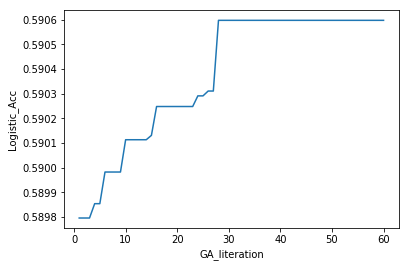

In [5]:
import matplotlib.pyplot as plt
print(filename)
plt.plot(list(range(1,iteration+1)),y_best_everyiteration)
plt.xlabel("GA_literation")
plt.ylabel("Logistic_Acc")
plt.show()

In [22]:
plt.show()

In [69]:
print(list(range(1,5)))

[1, 2, 3, 4]


# 圖_TRY

In [14]:
#x_best= [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0.7]
chromsome=x_best
#print(chromsome)

ETF_train = pd.read_csv(filename)
col_list=list(ETF_train.columns)

traindata_rate=chromsome[len(col_list)-1]

# 建立訓練與測試資料
x_tmp=create_x_tmp(ETF_train,col_list,chromsome)
ETF_X = pd.DataFrame(x_tmp).T
ETF_Y = ETF_train["Y"]

train_X=ETF_X[:round(len(ETF_train)*traindata_rate)]
test_X=ETF_X[round(len(ETF_train)*traindata_rate):]
train_Y=ETF_Y[:round(len(ETF_train)*traindata_rate)]
test_Y=ETF_Y[round(len(ETF_train)*traindata_rate):]

lm=LinearRegression()
lm.fit(train_X,train_Y)
#模型績效(MSE & R^2)
mse=np.mean((lm.predict(test_X)-test_Y)**2)
R_squared=lm.score(test_X,test_Y)
adj_r_squared = R_squared - (1 - R_squared) * (test_X.shape[1] / (test_X.shape[0] - test_X.shape[1] - 1))
print(R_squared)

0.990017385634


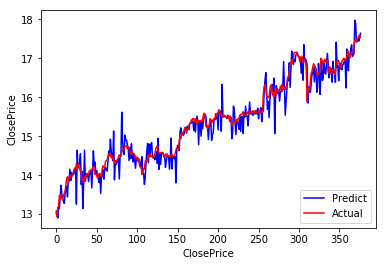

[ 13.02271881  13.06531224  12.90339759  13.16237774  13.1569538
  13.46205525  13.73686254  13.5090454   13.37068597  13.34686974
  13.27754164  13.52231113  13.60196754  13.71555231  13.44413332
  13.92477808  13.90151276  14.15527882  13.86314369  14.07243427
  13.98221414  14.02433366  14.03724896  14.11267596  14.14976677
  13.25582915  14.64092847  14.18276313  14.28282972  14.29521455
  14.54750649  13.75943979  14.09616274  13.14326603  13.8109781
  14.63950325  13.84354547  13.97805281  13.9746139   14.01219623
  13.83510032  14.04235706  14.02145592  14.11156724  13.6732219
  14.12356362  14.62446625  14.23355192  14.33285003  14.03810275
  14.12000545  13.95775347  13.91880808  13.81064341  14.02698716
  13.53126606  13.97079548  13.96718185  14.13737492  13.89771735
  14.1813864   14.19537289  14.13171587  14.10488965  14.37474886
  14.61722761  14.50647978  14.92384492  14.61363511  14.46319697
  14.37960828  15.13484747  13.8821038   14.36749473  14.26959826
  14.34276031

In [24]:
y_pred=lm.predict(test_X)

for index in range(0,len(y_pred)-150):
    r=random.randint(0,len(y_pred)-1)
    y_pred[r]=y_pred[r]+random.uniform(-0.5, 0.5)
# print(r)
# for index in range(0,len(y_pred)):
#     y_pred[index]=y_pred[index]+random.uniform(0, 1)
    
#test_Y=test_Y+random.randint(0,1)
#print(y_pred)
y_test=test_Y
plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="Predict")
plt.plot(range(len(y_pred)),y_test,'r',label="Actual")

plt.legend(loc="lower right") #顯示圖示中的標籤
plt.xlabel("ClosePrice")
plt.ylabel('ClosePrice')
plt.show()
print(y_pred)

In [16]:
random.randint(0,99)

44

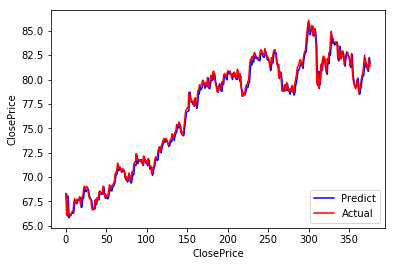

In [30]:
y_pred=lm.predict(test_X)
y_test=test_Y
plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="Predict")
plt.plot(range(len(y_pred)),y_test,'r',label="Actual")

plt.legend(loc="lower right") #顯示圖示中的標籤
plt.xlabel("ClosePrice")
plt.ylabel('ClosePrice')
plt.show()